> # ***Importing packages from python libraries***

In [1]:
### Import packages
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')                  # To apply seaborn whitegrid style to the plots.
%matplotlib inline
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

**Set the display column option**

In [2]:
pd.options.display.max_columns = 20 ##set column widths to display the data

## Read data from the CSV

In [3]:
NewyorkCityDf = pd.read_csv('AB_NYC_2019/AB_NYC_2019.csv') ## read the CSV file from kaggle

In [4]:
NewyorkCityDf.shape

(48895, 16)

In [5]:
NewyorkCityDf.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [6]:
NewyorkCityDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [7]:
import pandas_profiling 
profile = NewyorkCityDf.profile_report(title="newyork profling report")
profile.to_file(output_file="Newyork's_profiling_before_preprocessing.html")

 ## 01. Find the top 10 expensive Host names and price range

In [8]:
hostname_DF = NewyorkCityDf.loc[NewyorkCityDf.price>1500][['name','host_name', 'price']][:11].set_index('host_name').sort_values(by = 'price', ascending = False)
print(hostname_DF)

                                                    name  price
host_name                                                      
Jay And Liz           UWS 1BR w/backyard + block from CP   6000
Jessica              Beautiful 1 Bedroom in Nolita/Soho    5000
Lucy                    Sunny, Family-Friendly 2 Bedroom   4000
Tracey                  Beautiful 3 bedroom in Manhattan   3000
Martin        Architecturally Stunning Former Synagogue!   2500
Henry              Luxury 2Bed/2.5Bath Central Park View   2000
Henry                Lux 2Bed/2.5Bath Central Park Views   2000
Steve                1500 sq ft apt sleeps 8 - SuperBowl   2000
Josh                     Huge Loft with Private Entrance   1999
Ben And Jess         West Village Penthouse-terrace/view   1899
Jessica                                            Carol   1700


AxesSubplot(0.125,0.125;0.775x0.755)


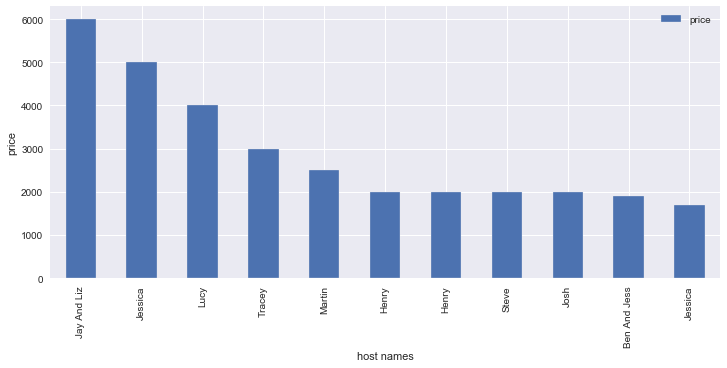

In [9]:
## Find the top 10 expensive Host's listing and host names

##NewyorkCityDf.setIndex(['host_name'])
hostname_DF = NewyorkCityDf.loc[NewyorkCityDf.price>1500][['host_name', 'price']][:11].set_index('host_name').sort_values(by = 'price', ascending = False).plot(kind = 'bar', figsize = (12,5))
plt.xlabel('host names')
plt.ylabel('price')
##hostname_DF.set_index('host_name')
print(hostname_DF)
##NewyorkCityDf.loc[NewyorkCityDf.price>1500][['host_name', 'price']][:11].sort_values(by = 'price', ascending = False).plot(kind = 'bar', xticks = 'host_name')

### Conclusion: 01
**Top 10 expensive hostnames are plotted on the graph.The 10 most expensive properties list are ranging from 1700-6000$. The most expensive host name is jay and Liz**

 ## 02. a : Find the top 10 expensive listing names and their neighbourhood

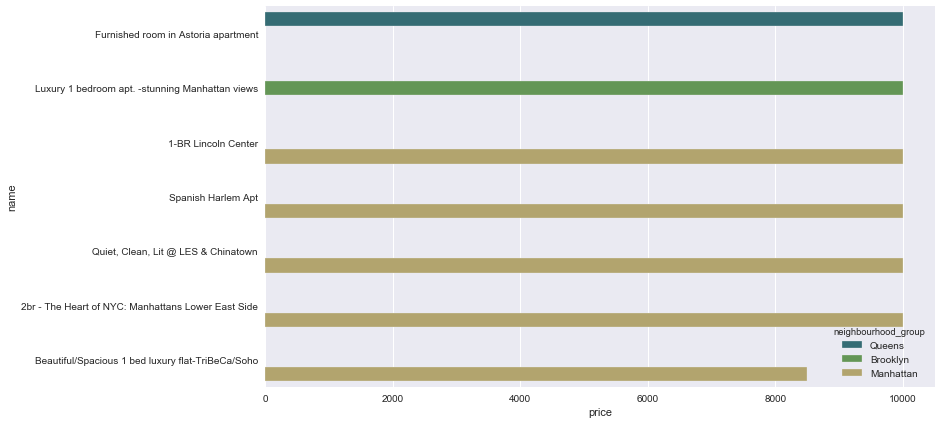

In [10]:

hostname_DF = NewyorkCityDf.loc[NewyorkCityDf.price>8000][['name', 'price', 'neighbourhood_group']][:11].sort_values(by = 'price', ascending = False)
plt.figure(figsize=(12,7))
sns.barplot(y="name", x="price", data=hostname_DF, hue = 'neighbourhood_group',palette= 'gist_earth')

### Conclusion: 02. a
** Top 10 expensive listing names are plotted on the graph.**
>> The 10 most expensive properties list are ranging from 8000-10000$. 
> > * Most expensive properties are in Manhatten

## 02.b Find the top 10 cheapest listing names and their neighbourhood group

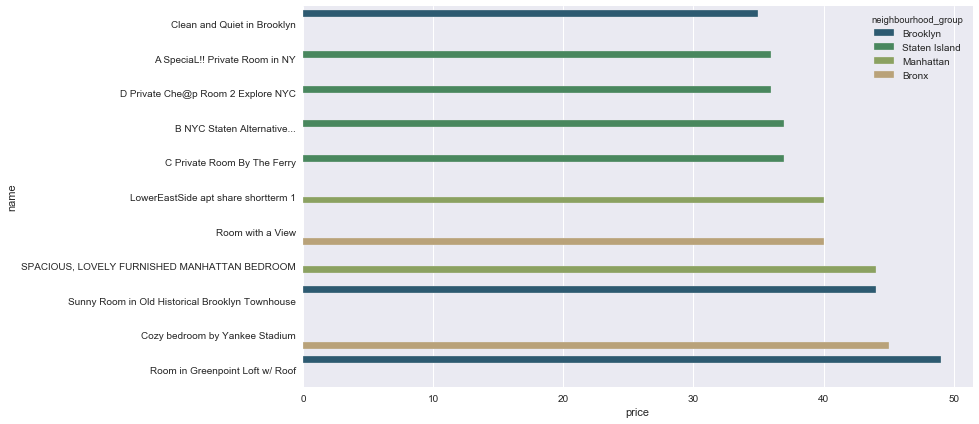

In [11]:
cheapesthostname_DF = NewyorkCityDf.loc[NewyorkCityDf.price<50][['name', 'price', 'neighbourhood_group']][:11].sort_values(by = 'price')
plt.figure(figsize=(12,7))
ax = sns.barplot(y="name", x="price", data=cheapesthostname_DF, hue = 'neighbourhood_group',palette= 'gist_earth')

> **Conclusion # 02.b :** The most cheapeast listing is Clean and quiet located in Brookly which will cost around 35$. other 3 cheapest listings which are located in Staten island

In [12]:
NewyorkCityDf.loc[NewyorkCityDf.price>8000][['host_name', 'price']][:11].sort_values(by = 'price', ascending = False)

,host_name,price
9151,Kathrine,10000
17692,Erin,10000
29238,Jelena,10000
6530,Olson,9999
12342,Amy,9999
40433,Matt,9999
30268,Rum,8500


In [13]:
NewyorkCityDf.columns.values.tolist()

['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

### 03: How many different room types in Newyork airbnp listed

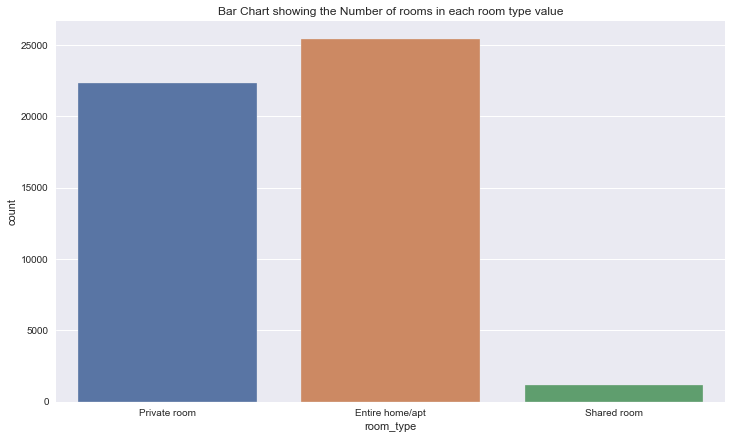

In [14]:
## Hom many different types of rooms types are there in airbnb hosted for newyork
# Using matplotlib to add labels and title to the plot. 
plt.figure(figsize=(12,7))
plt.xlabel('Room Types')
plt.ylabel('Number of Items')
plt.title('Bar Chart showing the Number of rooms in each room type value')

# In order to save your plot into an image on your system, use the following command.
# The image will be saved in the directory of this notebook.
sns.countplot(x='room_type',  data=NewyorkCityDf)

**Conclusion #3 In Newyork most of the rooms are entire home/apt type or Private rooms. Shared rooms are very less comparatively**

## 04: How many different types of rooms types are hosted on airbnb per neighbourhood in Newyork

Text(0.5, 1.0, 'Bar Chart showing the Number of listing per neighbourhood_group')

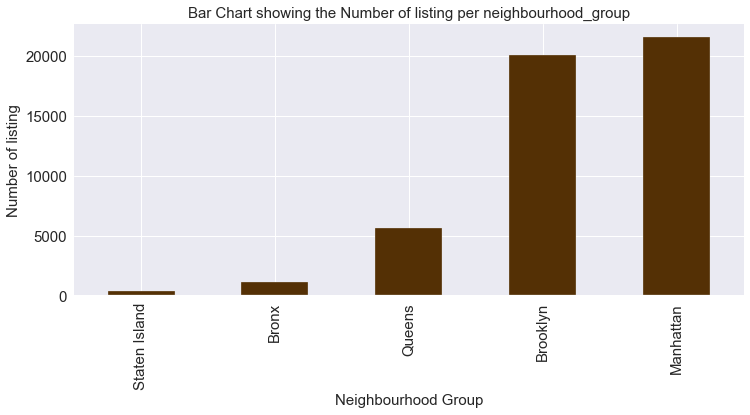

In [15]:
## Hom many different types of rooms types are there in airbnb hosted for newyork
NewyorkCityDf['neighbourhood_group'].value_counts().sort_values().plot(kind = 'bar',colormap='BrBG', figsize=(12,5), fontsize = 15) 
# Using matplotlib to add labels and title to the plot. 
# Pandas and matplotlib are linked with each other in the notebook by the use of this line in the Imports: %matplotlib inline

plt.xlabel('Neighbourhood Group', fontsize=15)
plt.ylabel('Number of listing', fontsize=15)
plt.title('Bar Chart showing the Number of listing per neighbourhood_group', fontsize=15)


**Conclusion #4: Majority of the apartments are in manhattan and brooklyn. There are very few lsiting in staten island**

**## 05: Find out how the private room, entire apt, shared rooms are distributed across neighbourhoods**

In [16]:
roomtypecount = pd.Series(NewyorkCityDf.groupby(['neighbourhood_group'])['room_type'].value_counts())

In [17]:
roomtypecount

neighbourhood_group  room_type      
Bronx                Private room         652
                     Entire home/apt      379
                     Shared room           60
Brooklyn             Private room       10132
                     Entire home/apt     9559
                     Shared room          413
Manhattan            Entire home/apt    13199
                     Private room        7982
                     Shared room          480
Queens               Private room        3372
                     Entire home/apt     2096
                     Shared room          198
Staten Island        Private room         188
                     Entire home/apt      176
                     Shared room            9
Name: room_type, dtype: int64

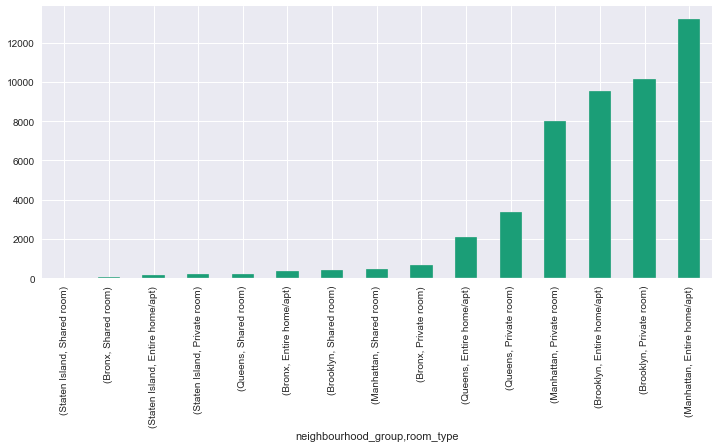

In [18]:
NewyorkCityDf.groupby(['neighbourhood_group'])['room_type'].value_counts().sort_values().plot(kind = 'bar', figsize=(12,5), colormap = 'Dark2')

**Conclusion # 5: Manhatten has the most highest number of entire apt type listing compare to private room or shared room. in Brokkly the entire apt and private apt are some what closer in number**

**## 06: In which neighbourhood group the average listing prices are high **

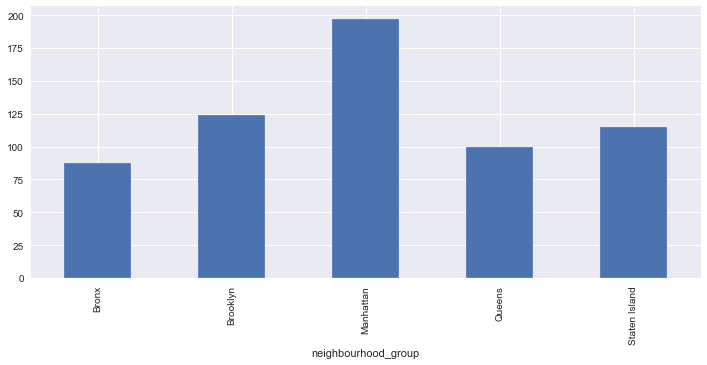

In [19]:
NewyorkCityDf.groupby(['neighbourhood_group'])['price'].mean().plot(kind = 'bar', figsize=(12,5))

In [20]:
NewyorkCityDf.groupby(['neighbourhood_group','room_type'])['price'].mean().sort_values(ascending = False)

neighbourhood_group  room_type      
Manhattan            Entire home/apt    249.239109
Brooklyn             Entire home/apt    178.327545
Staten Island        Entire home/apt    173.846591
Queens               Entire home/apt    147.050573
Bronx                Entire home/apt    127.506596
Manhattan            Private room       116.776622
                     Shared room         88.977083
Brooklyn             Private room        76.500099
Queens               Private room        71.762456
                     Shared room         69.020202
Bronx                Private room        66.788344
Staten Island        Private room        62.292553
Bronx                Shared room         59.800000
Staten Island        Shared room         57.444444
Brooklyn             Shared room         50.527845
Name: price, dtype: float64

** Conclusion # 6: In manhatten the listing price is high for all types of rooms where in brookly shared rooms are cheapest compared to other neighbourhood states.**

**## 7: How are rooms are distributed in each neighbourhood_group**

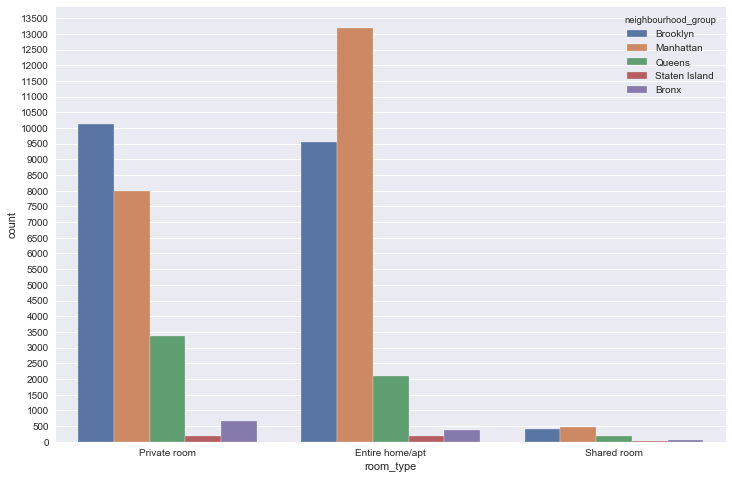

In [21]:
plt.figure(figsize=(12,8))
ytickrange = np.arange(0, 14000, 500) 
ax = sns.countplot(x='room_type', hue="neighbourhood_group", data=NewyorkCityDf)
ax.set_yticks(ytickrange)

**Conclusion # 7: In Manhatten majority of the rooms are entire home type where in Brooklyn majority of the rooms are private rooms. In Staten island and bronx the shared rooms are very very less**

**## Find the low cost and middle cost properties per neighbourhood group**

In [22]:
def groupPrice(price):
    if price < 100:
        return "Low Cost"
    elif price >=100 and price < 200:
        return "Middle Cost"
    else:
        return "High Cost"
      
price_group = NewyorkCityDf['price'].apply(groupPrice)
NewyorkCityDf.insert(10, "price_group", price_group, True)
NewyorkCityDf.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,price_group,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,Middle Cost,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,High Cost,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,Middle Cost,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,Low Cost,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,Low Cost,10,9,2018-11-19,0.10,1,0


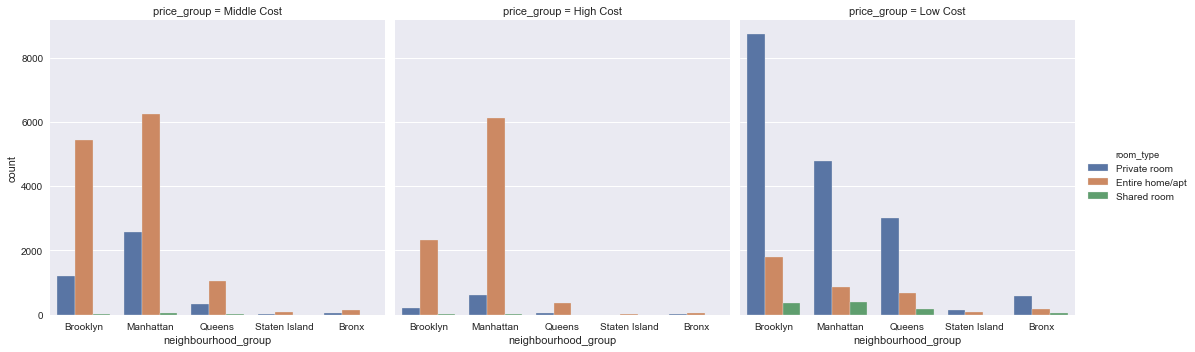

In [23]:
g = sns.catplot(x="neighbourhood_group", hue="room_type",col="price_group", data=NewyorkCityDf, kind="count", height=5, aspect=1)
plt.show()

**Conclusion # 8 : The plot reveals that Brooklyn might be a good choice for an individual traveler who aims for a low cost private room. Either Manhattan or Brooklyn might be a desirable destination for a family/group trip because this is relatively easier to get an entire home/apartment unit with a reasonable middle price range that can be shared by a group of travelers.**

In [24]:
BBox = ((NewyorkCityDf.longitude.min(),NewyorkCityDf.longitude.max(),NewyorkCityDf.latitude.min(),NewyorkCityDf.latitude.max()))

In [25]:
BBox

(-74.24441999999999, -73.71299, 40.499790000000004, 40.913059999999994)

In [26]:
newyorkMap = plt.imread("AB_NYC_2019/NYC_UV.jpg")

In [27]:
df_latlon = NewyorkCityDf[['latitude', 'longitude']]
latlonlist = df_latlon.values.tolist()
print(latlonlist[7])

[40.76489, -73.98493]


In [28]:
'''import folium
folium_map = folium.Map(location=[40.738, -73.98],
                        zoom_start=13,tiles='CartoDB dark_matter',max_zoom=20)


for point in range(0, len(latlonlist) <=10000):
    folium.Marker(location = latlonlist[point], popup=NewyorkCityDf['price'][point], icon='male', icon_color='white').add_to(folium_map)
##map

##folium.CircleMarker(location=[40.738, -73.98],fill=True).add_to(folium_map)
folium_map

daytime_robberies = NewyorkCityDf[((NewyorkCityDf.price <= 350) & \
    ]

m_2 = folium.Map(location=[40.738, -73.98], tiles='cartodbpositron', zoom_start=13)

# Add points to the map
for idx, row in daytime_robberies.iterrows():
    Marker([row['Lat'], row['Long']]).add_to(m_2)

# Display the map
embed_map(m_2, 'm_2.html')'''

"import folium\nfolium_map = folium.Map(location=[40.738, -73.98],\n                        zoom_start=13,tiles='CartoDB dark_matter',max_zoom=20)\n\n\nfor point in range(0, len(latlonlist) <=10000):\n    folium.Marker(location = latlonlist[point], popup=NewyorkCityDf['price'][point], icon='male', icon_color='white').add_to(folium_map)\n##map\n\n##folium.CircleMarker(location=[40.738, -73.98],fill=True).add_to(folium_map)\nfolium_map\n\ndaytime_robberies = NewyorkCityDf[((NewyorkCityDf.price <= 350) &     ]\n\nm_2 = folium.Map(location=[40.738, -73.98], tiles='cartodbpositron', zoom_start=13)\n\n# Add points to the map\nfor idx, row in daytime_robberies.iterrows():\n    Marker([row['Lat'], row['Long']]).add_to(m_2)\n\n# Display the map\nembed_map(m_2, 'm_2.html')"

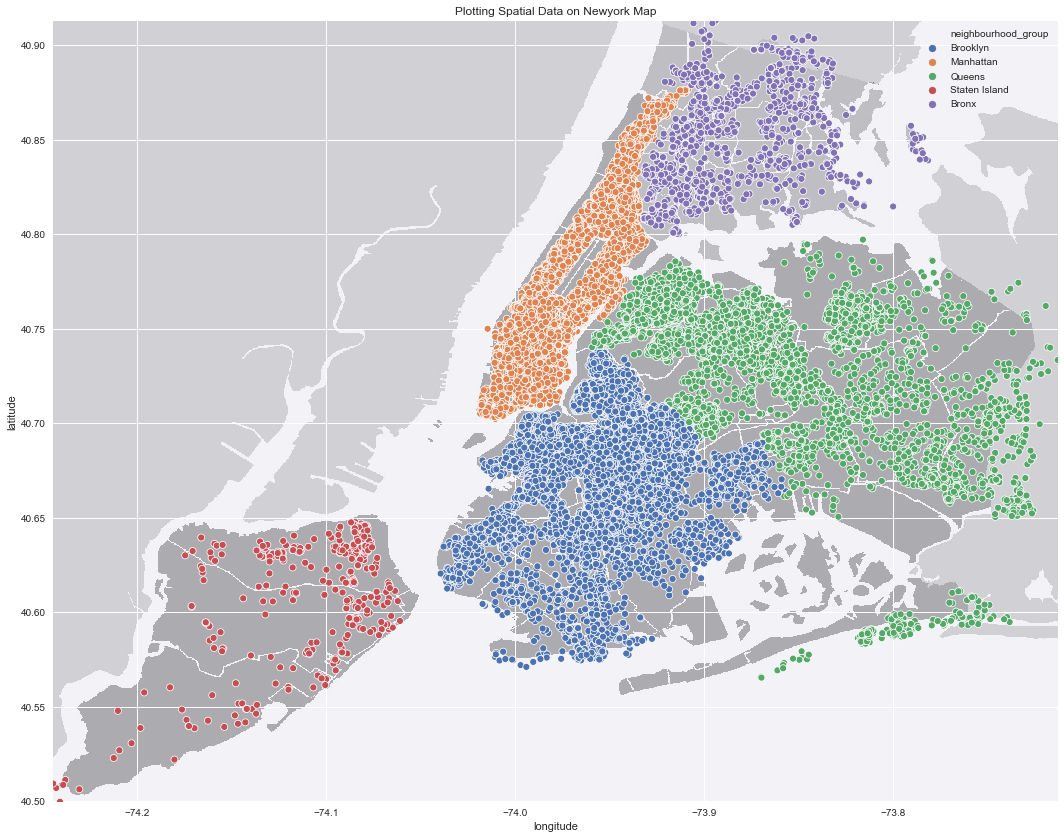

In [29]:
ig, ax = plt.subplots(figsize = (18,20))
ax = sns.scatterplot(data=NewyorkCityDf, x='longitude', y='latitude', hue='neighbourhood_group')
##(NewyorkCityDf.longitude, NewyorkCityDf.latitude, zorder=1, alpha= 0.5, c='b', s=10)
ax.set_title('Plotting Spatial Data on Newyork Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(newyorkMap, zorder=0, extent = BBox, aspect= 'equal', alpha = 0.5, cmap  = 'winter')

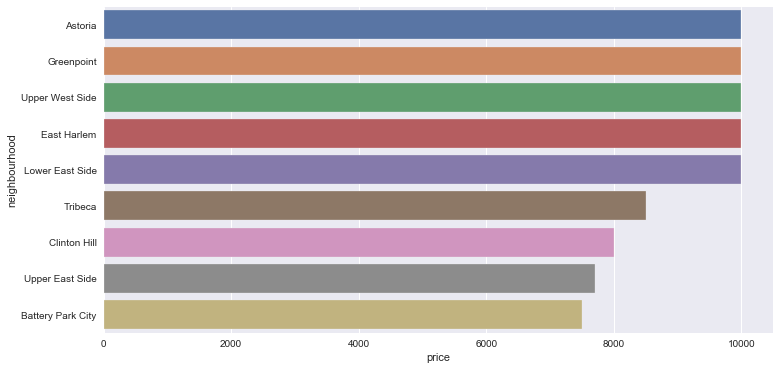

In [30]:
plt.figure(figsize=(12,6))
sns.barplot(y="neighbourhood", x="price", data=NewyorkCityDf.nlargest(10,['price']))
plt.ioff()

In [31]:
data=NewyorkCityDf.nlargest(10,['price'])

In [32]:
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,price_group,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
9151,7003697,Furnished room in Astoria apartment,20582832,Kathrine,Queens,Astoria,40.76810,-73.91651,Private room,10000,High Cost,100,2,2016-02-13,0.04,1,0
17692,13894339,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Erin,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,High Cost,5,5,2017-07-27,0.16,1,0
29238,22436899,1-BR Lincoln Center,72390391,Jelena,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,High Cost,30,0,NaN,NaN,1,83
6530,4737930,Spanish Harlem Apt,1235070,Olson,Manhattan,East Harlem,40.79264,-73.93898,Entire home/apt,9999,High Cost,5,1,2015-01-02,0.02,1,0
12342,9528920,"Quiet, Clean, Lit @ LES & Chinatown",3906464,Amy,Manhattan,Lower East Side,40.71355,-73.98507,Private room,9999,High Cost,99,6,2016-01-01,0.14,1,83
40433,31340283,2br - The Heart of NYC: Manhattans Lower East ...,4382127,Matt,Manhattan,Lower East Side,40.71980,-73.98566,Entire home/apt,9999,High Cost,30,0,NaN,NaN,1,365
30268,23377410,Beautiful/Spacious 1 bed luxury flat-TriBeCa/Soho,18128455,Rum,Manhattan,Tribeca,40.72197,-74.00633,Entire home/apt,8500,High Cost,30,2,2018-09-18,0.18,1,251
4377,2953058,Film Location,1177497,Jessica,Brooklyn,Clinton Hill,40.69137,-73.96723,Entire home/apt,8000,High Cost,1,1,2016-09-15,0.03,11,365
29662,22779726,East 72nd Townhouse by (Hidden by Airbnb),156158778,Sally,Manhattan,Upper East Side,40.76824,-73.95989,Entire home/apt,7703,High Cost,1,0,NaN,NaN,12,146
42523,33007610,70' Luxury MotorYacht on the Hudson,7407743,Jack,Manhattan,Battery Park City,40.71162,-74.01693,Entire home/apt,7500,High Cost,1,0,NaN,NaN,1,364


In [33]:
'''import plotly.graph_objects as go
fig = go.Figure(data=go.Scattergeo(
        locationmode = 'USA-states',
        lon = NewyorkCityDf['longitude'],
        lat = NewyorkCityDf['latitude'],
        text = NewyorkCityDf['price'],
        mode = 'markers',
        marker = dict(
            size = 8,
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            symbol = 'square',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            colorscale = 'Blues',
            cmin = 0,
            colorbar_title="Incoming flights<br>February 2011"
        )))'''

'import plotly.graph_objects as go\nfig = go.Figure(data=go.Scattergeo(\n        locationmode = \'USA-states\',\n        lon = NewyorkCityDf[\'longitude\'],\n        lat = NewyorkCityDf[\'latitude\'],\n        text = NewyorkCityDf[\'price\'],\n        mode = \'markers\',\n        marker = dict(\n            size = 8,\n            opacity = 0.8,\n            reversescale = True,\n            autocolorscale = False,\n            symbol = \'square\',\n            line = dict(\n                width=1,\n                color=\'rgba(102, 102, 102)\'\n            ),\n            colorscale = \'Blues\',\n            cmin = 0,\n            colorbar_title="Incoming flights<br>February 2011"\n        )))'

In [34]:
'''fig.update_layout(
        title = 'Most trafficked US airports<br>(Hover for airport names)',
        geo = dict(
            scope='north america',
            projection_type='albers usa',
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 1,
            subunitwidth = 1
        ),
    )
fig.show()'''

'fig.update_layout(\n        title = \'Most trafficked US airports<br>(Hover for airport names)\',\n        geo = dict(\n            scope=\'north america\',\n            projection_type=\'albers usa\',\n            showland = True,\n            landcolor = "rgb(250, 250, 250)",\n            subunitcolor = "rgb(217, 217, 217)",\n            countrycolor = "rgb(217, 217, 217)",\n            countrywidth = 1,\n            subunitwidth = 1\n        ),\n    )\nfig.show()'

In [35]:
'''from plotly.offline import init_notebook_mode, iplot
data = [go.Scattergeo(lon=NewyorkCityDf['longitude'],
        lat = NewyorkCityDf['latitude'],
        text = NewyorkCityDf['price'],                     
        name='',
        marker=dict(size=NewyorkCityDf['price'],color='blue'))]'''


"from plotly.offline import init_notebook_mode, iplot\ndata = [go.Scattergeo(lon=NewyorkCityDf['longitude'],\n        lat = NewyorkCityDf['latitude'],\n        text = NewyorkCityDf['price'],                     \n        name='',\n        marker=dict(size=NewyorkCityDf['price'],color='blue'))]"

In [36]:
'''layout = go.Layout(title=go.layout.Title(text='Top 10 outlets in terms of Number of Employees'), showlegend=False,
                   geo=dict(scope='usa', projection=go.layout.geo.Projection(type='albers usa'), showlakes=True,
                            lakecolor='rgb(255, 255, 255)'))'''

"layout = go.Layout(title=go.layout.Title(text='Top 10 outlets in terms of Number of Employees'), showlegend=False,\n                   geo=dict(scope='usa', projection=go.layout.geo.Projection(type='albers usa'), showlakes=True,\n                            lakecolor='rgb(255, 255, 255)'))"

In [37]:
'''fig = go.Figure(data=data, layout=layout)'''

'fig = go.Figure(data=data, layout=layout)'

In [38]:
'''iplot(fig, filename='d3-cloropleth-map')'''

"iplot(fig, filename='d3-cloropleth-map')"